### Optimization: Evolution Strategy with single adaptive mutation step-size in Python
###### by Hamed Shah-Hosseini
Here, the Evolution Strategy (ES) with adaptive mutation step-size is implemented for n-dimensional (n-D) continuous function optimization (minimization)
<br>Explanation at: https://www.pinterest.com/HamedShahHosseini/
<br>https://github.com/ostad-ai/Optimization

In [35]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [128]:
# Rastrigin function n-dimensional
# input: is one or two-dimensional numpy array
# output: scalar or one-dimensional numpy array
def rastrigin(x):
    assert x.ndim==1 or x.ndim==2
    if x.ndim>1:
        n=x.shape[1]
        return 10*n+np.sum(x**2-10*np.cos(2*np.pi*x),axis=1) 
    else:
        n=x.shape[0]
        return 10*n+np.sum(x**2-10*np.cos(2*np.pi*x))

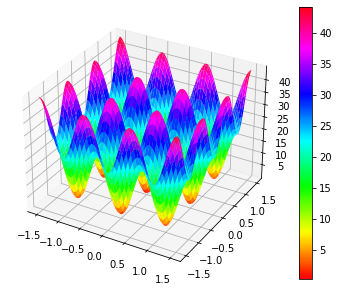

In [118]:
#plotting 2D Rastrigin function
xmin,xmax,ymin,ymax=-1.5,1.5,-1.5,1.5; noPoints=100
x,y=np.linspace(xmin,xmax,noPoints),np.linspace(ymin,ymax,noPoints)
xs,ys=np.meshgrid(x,y,indexing='ij')
zs=rastrigin(np.vstack([xs.flatten(),ys.flatten()]).T).reshape(xs.shape)
fig=plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(xs,ys,zs,cmap=plt.cm.hsv)
fig.colorbar(surf); plt.show()

In [126]:
# ES with single adaptive mutation, n-dimensional
def evolution_strategy_mutation(func,x0,sigma0=.1,
                    tau=1.,sigma_min=.001,maxIter=1000):
    x=x0.copy(); sigma=sigma0; n=x.shape[0]
    for i in range(maxIter):
        sigma_y=sigma*np.exp(tau*np.random.normal(0,1))
        y=x+sigma_y*np.random.normal(0,1,n)
        if func(y)<func(x): 
            x=y.copy()
            sigma=sigma_y
            # to prevent very small sigma
            if sigma<sigma_min: sigma=sigma_min
    return x,func(x)

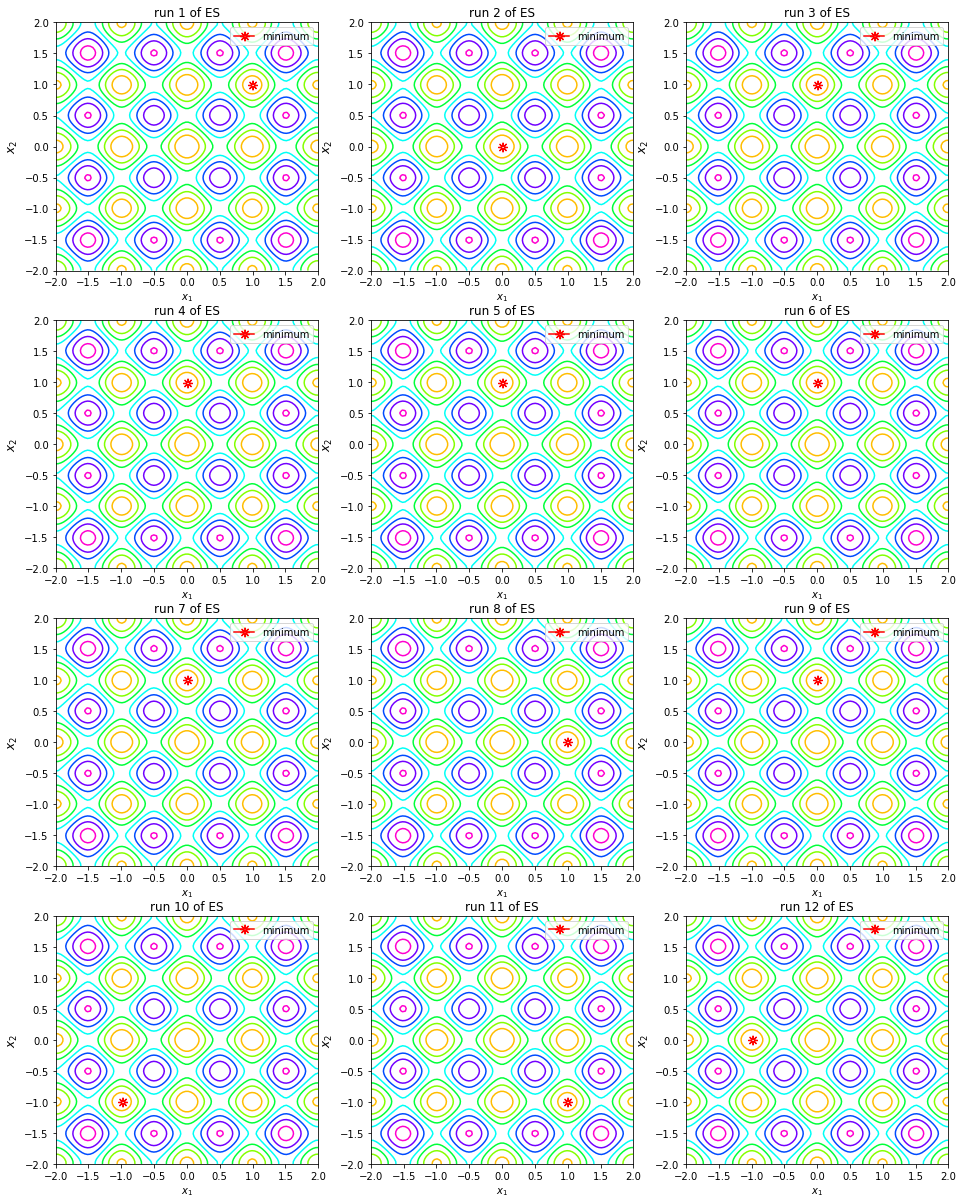

In [127]:
# find minimum point x* for f(x) with ES
xmin,xmax,ymin,ymax=-2.,2.,-2.,2.; noPoints=100
plt.figure(figsize=(16,21)) 
x,y=np.linspace(xmin,xmax,noPoints),np.linspace(ymin,ymax,noPoints)
xs,ys=np.meshgrid(x,y,indexing='ij')
zs=rastrigin(np.vstack([xs.flatten(),ys.flatten()]).T).reshape(xs.shape)
x0=np.array([.5,.7]) #initial guess
sigma0=.1; #inital mutation step size
for i in range(12):
    x_star,y_star=evolution_strategy_mutation(rastrigin,x0,sigma0)
    plt.subplot(4,3,i+1) 
    plt.plot(x_star[0],x_star[1],marker='$\U0000263C$',ms=10,
             c='red',label='minimum')
    plt.contour(xs,ys,zs,cmap=plt.cm.hsv)    
    plt.title(f'run {i+1} of ES');plt.xlabel('$x_1$',fontsize=10)
    plt.ylabel('$x_2$',fontsize=12); plt.legend() 
plt.show()